In [1]:
import osmnx as ox
import pandas as pd
import geopandas as gdp

import numpy as np
import networkx as nx
import os
import sys
import pickle

from shapely.geometry import Polygon, MultiPolygon
from descartes import PolygonPatch

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib import ticker
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [2]:
ROOT_DIR = "/home/charles/Projects/QcMtlStreets"

In [3]:
sys.path.append(os.path.join(ROOT_DIR, "Python"))   

In [4]:
from OsmnxElev import *

In [5]:
listGraphs, listNodes=getSubgraphListNeighQc(["Saint-Roch","Saint-Jean-Baptiste","Vieux-Qu"])

File exists => reading graph


In [6]:
listGraphs

{'Saint-Roch': <networkx.classes.multidigraph.MultiDiGraph at 0x7f5c4b2e2198>,
 'Saint-Jean-Baptiste': <networkx.classes.multidigraph.MultiDiGraph at 0x7f5c4b2e2240>,
 'Vieux-Qu': <networkx.classes.multidigraph.MultiDiGraph at 0x7f5c4b2e20f0>}

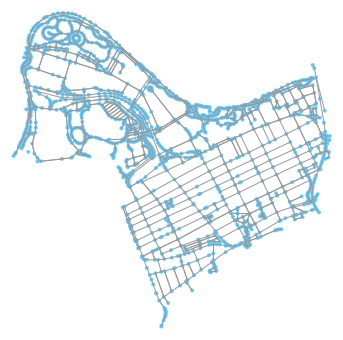

In [27]:
fig,ax =ox.plot_graph(listGraphs['Saint-Roch'],show=False,close=False)


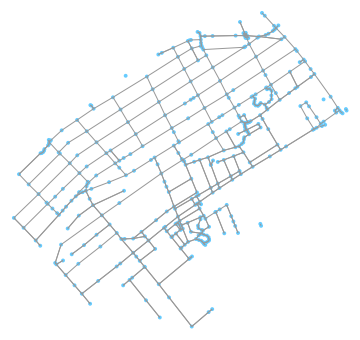

In [28]:
fig,ax= ox.plot_graph(listGraphs['Saint-Jean-Baptiste'],show=False,close=False)

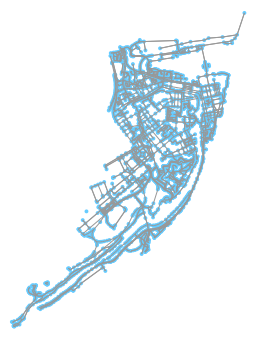

(<Figure size 468.066x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3d44a14fd0>)

In [29]:
ox.plot_graph(listGraphs["Vieux-Qu"])

Computing edge bearings


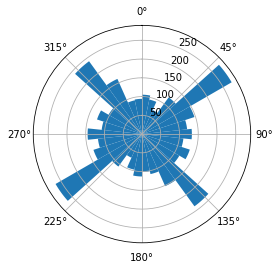

In [9]:
bar,ax = plotEdgeBearing(listGraphs['Saint-Roch'])
fig=ax.get_figure()
fig.savefig(os.path.join(ROOT_DIR,"Figures","qcBearingsStRoch.png"))

Computing edge bearings


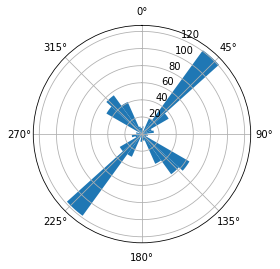

In [10]:
bar,ax=plotEdgeBearing(listGraphs['Saint-Jean-Baptiste'])
fig=ax.get_figure()
fig.savefig(os.path.join(ROOT_DIR,"Figures","qcBearingsSJB.png"))

Computing edge bearings


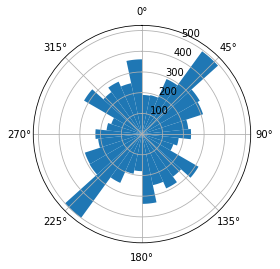

In [12]:
bar, ax=plotEdgeBearing(listGraphs["Vieux-Qu"])
fig=ax.get_figure()
fig.savefig(os.path.join(ROOT_DIR,"Figures","qcBearingsVieuxQc.png"))

In [13]:
filePathPickle=os.path.join(ROOT_DIR,"Data","Pickle", "graphElevationQc.pickle")
if os.path.isfile(filePathPickle):
    print("File exists => reading graph")
    pickle_inQc = open(filePathPickle,"rb")
    graphQcWithElevation = pickle.load(pickle_inQc)
else:
    print("File does not exists => calling google api")
graphQcWithElevationBearings=ox.add_edge_bearings(graphQcWithElevation)


File exists => reading graph


Computing edge bearings


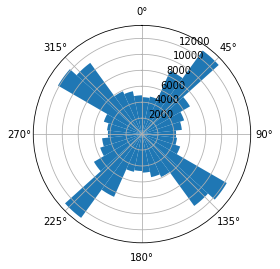

In [21]:
bar,ax=plotEdgeBearing(graphQcWithElevationBearings)
fig=ax.get_figure()
fig.savefig(os.path.join(ROOT_DIR,"Figures","qcBearingsAllQc.png"))

In [26]:
len(graphQcWithElevationBearings.edges)

203617

In [ ]:
*****

In [16]:
filePathPickle=os.path.join(ROOT_DIR,"Data","Pickle", "graphElevationMtl.pickle")
if os.path.isfile(filePathPickle):
    print("File exists => reading graph")
    pickle_inMtl = open(filePathPickle,"rb")
    graphMtlWithElevation = pickle.load(pickle_inMtl)
else:
    print("File does not exists => calling google api")
graphMtlWithElevationBearings=ox.add_edge_bearings(graphMtlWithElevation)


File exists => reading graph


Computing edge bearings


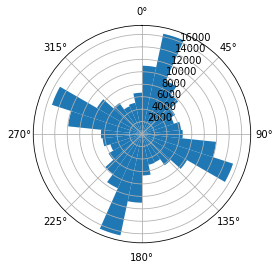

In [22]:
bar,ax=plotEdgeBearing(graphMtlWithElevationBearings)
fig=ax.get_figure()
fig.savefig(os.path.join(ROOT_DIR,"Figures","mtlBearingsAllMtl.png"))

In [25]:
len(graphMtlWithElevationBearings.edges)

255336

In [ ]:
*****

In [19]:
place=["Lausanne, Switzerland"]
graphLausanne=ox.graph_from_place(place)

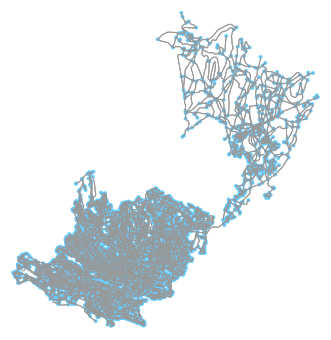

(<Figure size 609.869x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5c258aa8d0>)

In [20]:
ox.plot_graph(graphLausanne,
            file_format='png', 
            filename=os.path.join(ROOT_DIR,"Figures","lausanneGraph.png"))

Computing edge bearings


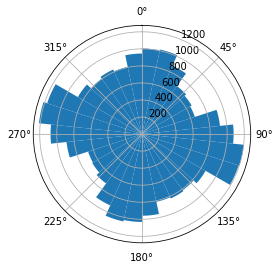

In [23]:
bar,ax=plotEdgeBearing(graphLausanne)
fig=ax.get_figure()
fig.savefig(os.path.join(ROOT_DIR,"Figures","lausanneBearings.png"))

In [24]:
len(graphLausanne.edges)

27284